<a href="https://colab.research.google.com/github/lazarvelinov46/GI_Project/blob/main/GI_Project_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Result analysis
Reading spatially variable genes from text files

In [14]:
def read_genes_from_txt(filename):
    with open(filename, 'r') as file:
        genes = [line.strip() for line in file]
    return genes

Reading SVG calculated based on entropy

In [15]:
embryo_filename_entropy = 'svg_genes_embryo_8.txt'
brain_filename_entropy = 'svg_genes_brain_8.txt'

svg_genes_embryo_entropy = read_genes_from_txt(embryo_filename_entropy)

svg_genes_brain_entropy = read_genes_from_txt(brain_filename_entropy)

Reading SVG calculated based on SpaGFT (considered ground truth)

In [16]:
embryo_filename_SpaGFT='svg_genes_embryo_SpaGFT.txt'
brain_filename_SpaGFT='svg_genes_brain_SpaGFT.txt'


svg_genes_embryo_SpaGFT = read_genes_from_txt(embryo_filename_SpaGFT)

svg_genes_brain_SpaGFT = read_genes_from_txt(brain_filename_SpaGFT)

Reading SVG calculated based on Moran's I score

In [17]:
embryo_filename_moransi='/content/svg_genes_embryo_moranI.txt'
brain_filename_moransi='/content/svg_genes_brain_moranI.txt'

svg_genes_embryo_moransi=read_genes_from_txt(embryo_filename_moransi)
svg_genes_brain_moransi=read_genes_from_txt(brain_filename_moransi)

Installing scanpy and importing packages

In [18]:
!pip install scanpy
import scanpy as sc

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading anndata files, which will be needed for gene list and spatial plotting of pictures

In [20]:
file_path_brain = '/content/drive/My Drive/GI_Data/Mouse_brain_cell_bin.h5ad'
file_path_embryo = '/content/drive/My Drive/GI_Data/E9.5_E1S1.MOSTA.h5ad'

In [21]:
anndata_brain=sc.read(file_path_brain)
anndata_embryo=sc.read(file_path_embryo)

Only considering the two last: ['.MOSTA', '.h5ad'].
Only considering the two last: ['.MOSTA', '.h5ad'].


In [22]:
sc.pp.filter_genes(anndata_embryo, min_cells=10)
sc.pp.filter_genes(anndata_brain, min_cells=10)

Visualizing spatially variable genes calculated based on Moran's I score

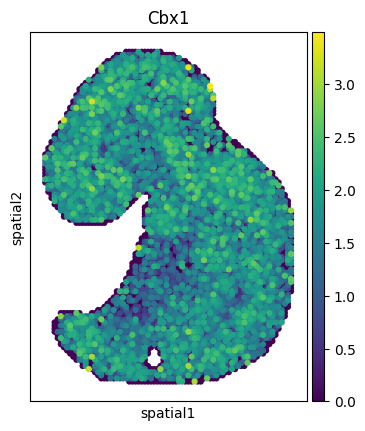

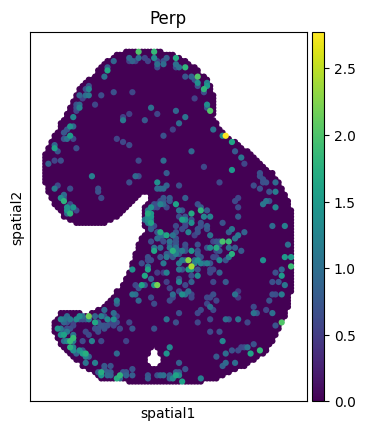

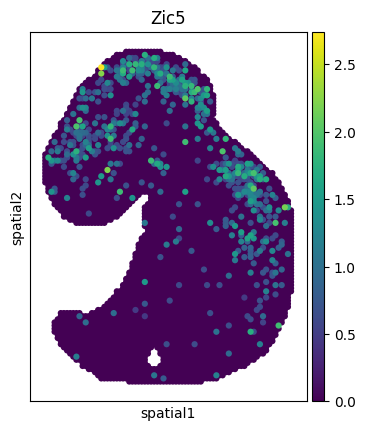

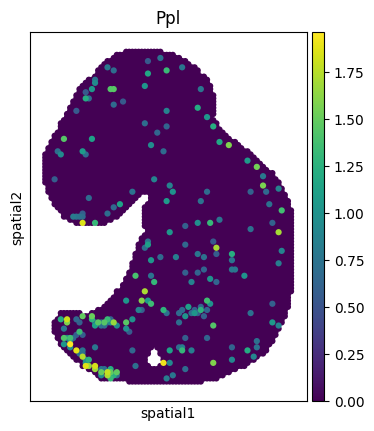

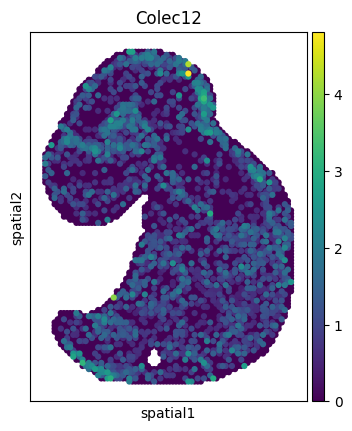

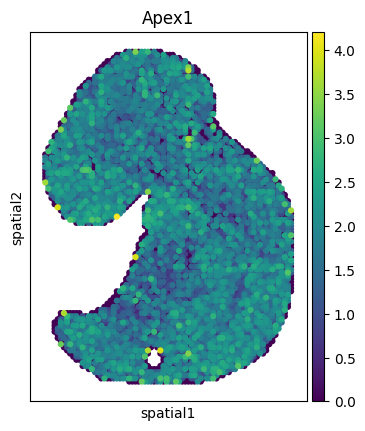

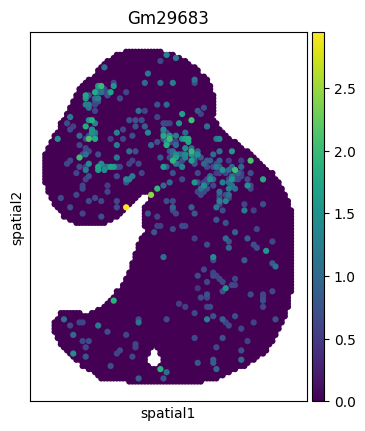

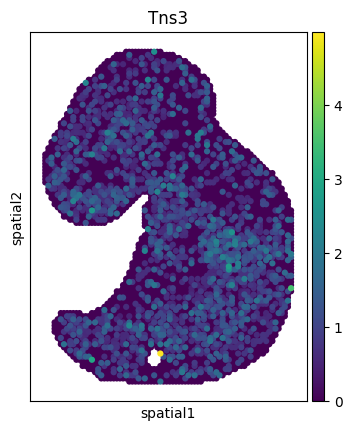

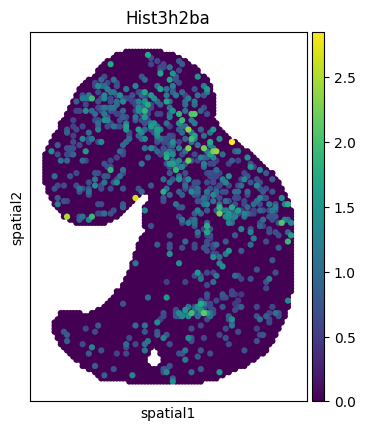

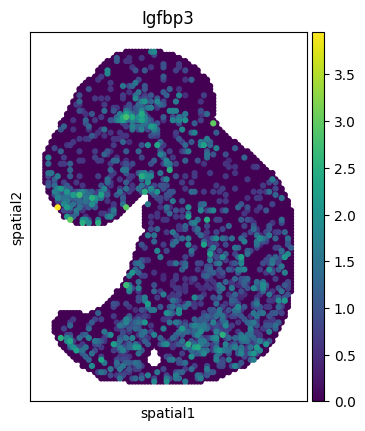

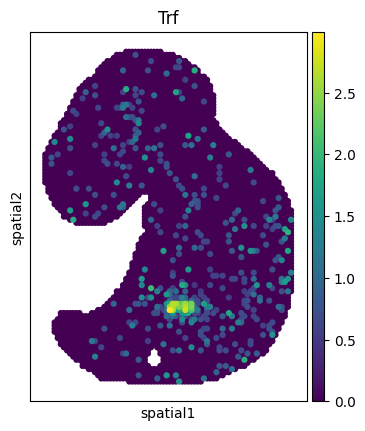

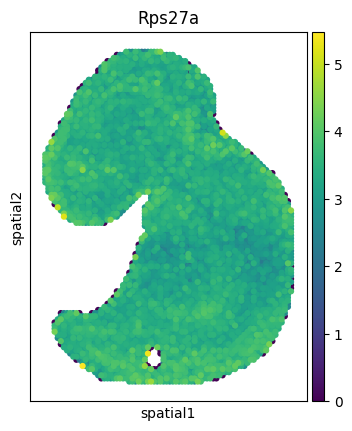

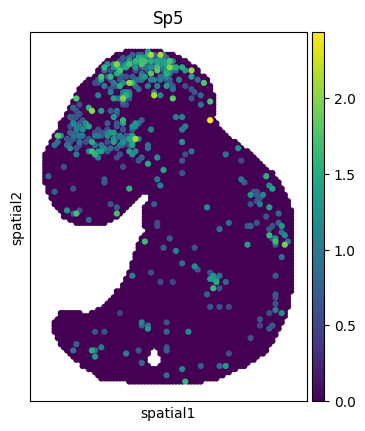

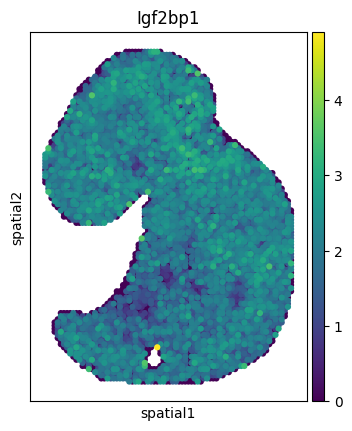

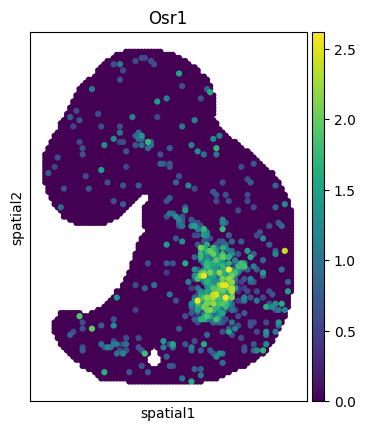

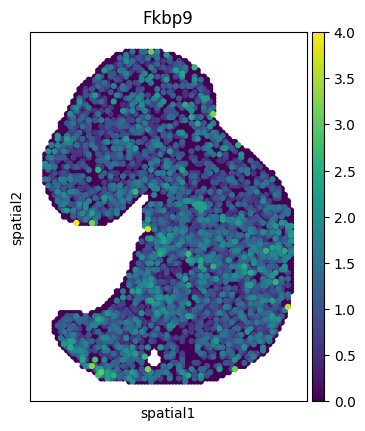

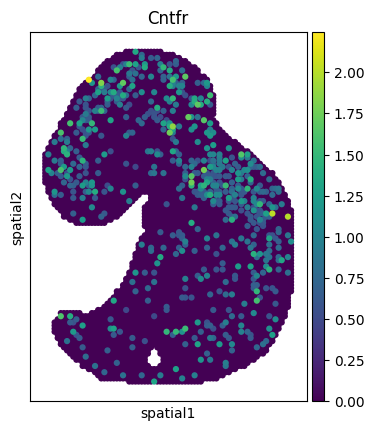

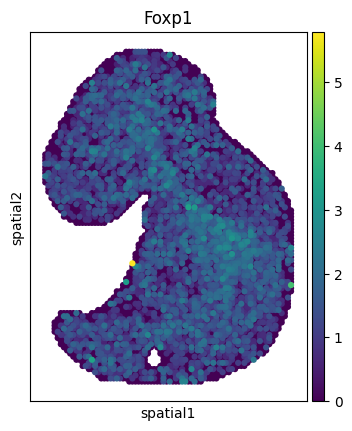

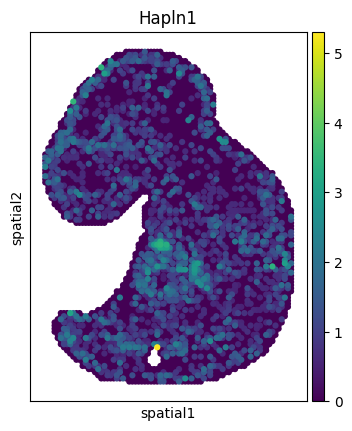

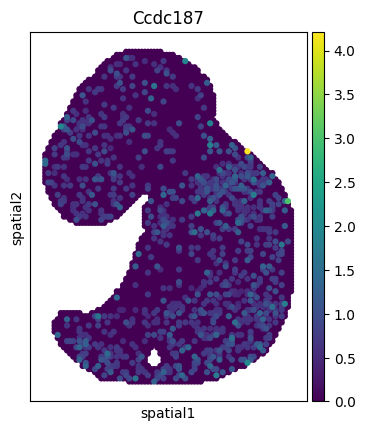

In [26]:
import numpy as np
subset_genes = np.random.choice(svg_genes_embryo_moransi, size=20, replace=False)
adata_subset = anndata_embryo[:, subset_genes]
for g in subset_genes:
  sc.pl.spatial(adata_subset, color=g, spot_size=2, show=True)

Visualizing spatially variable genes calculated based entropy

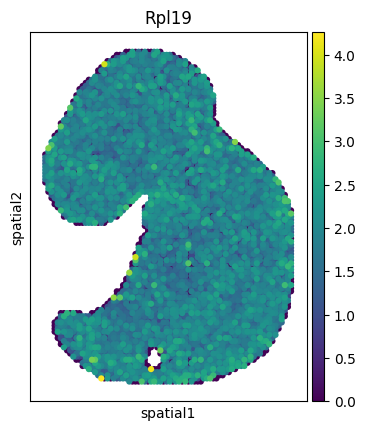

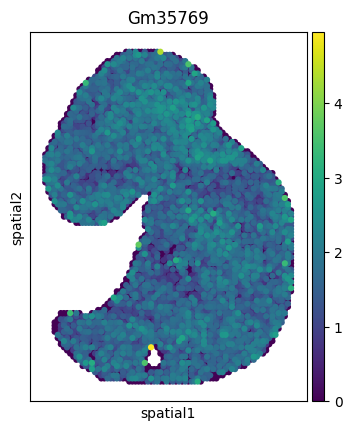

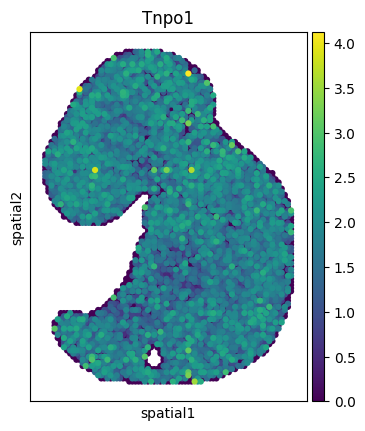

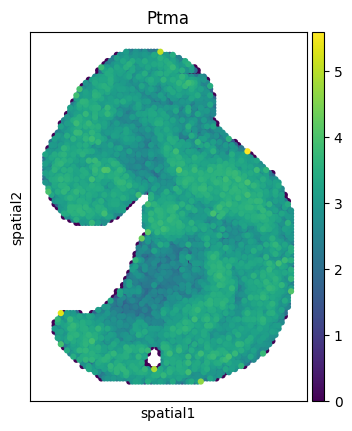

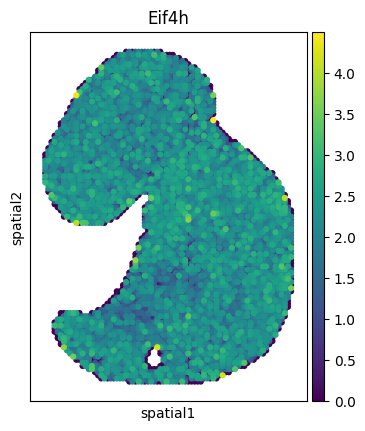

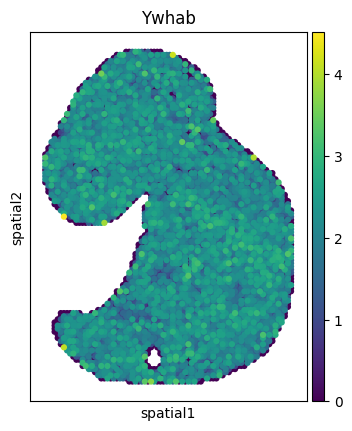

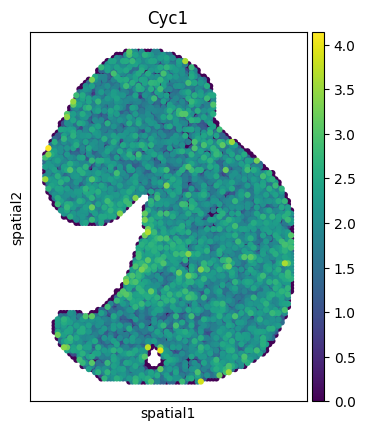

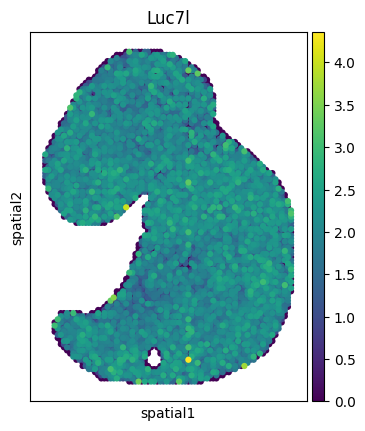

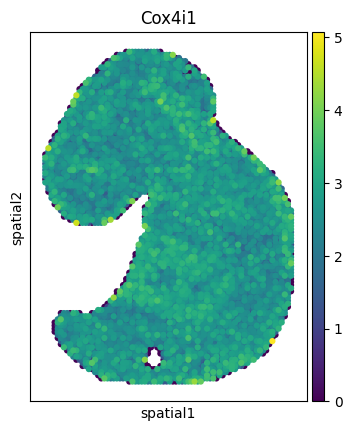

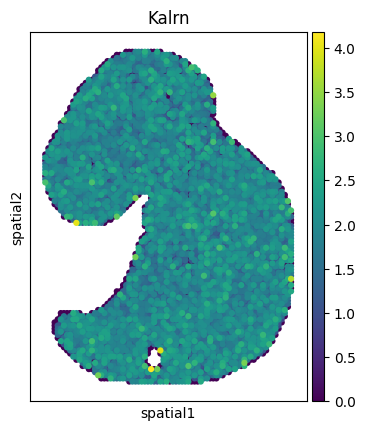

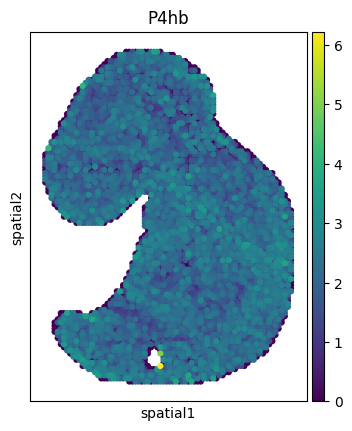

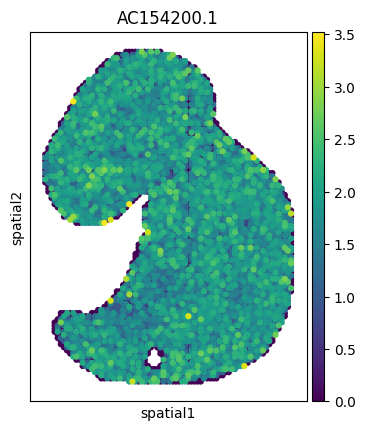

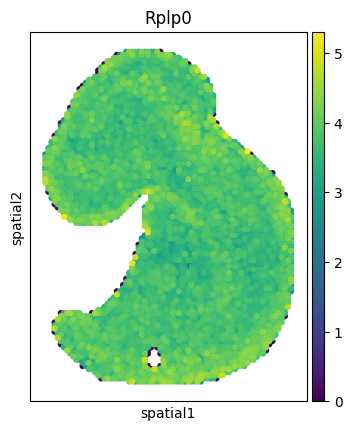

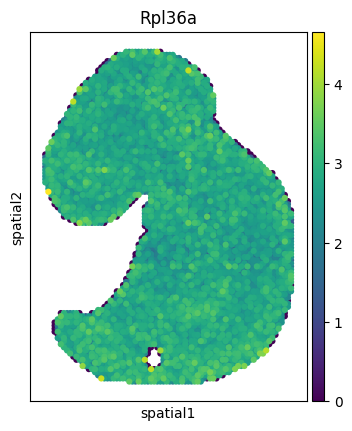

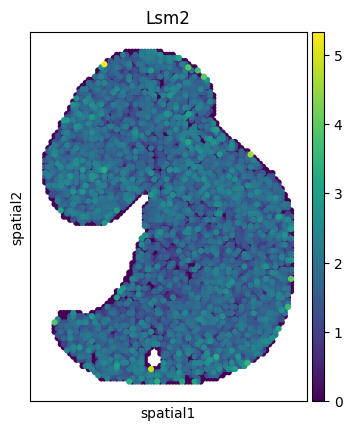

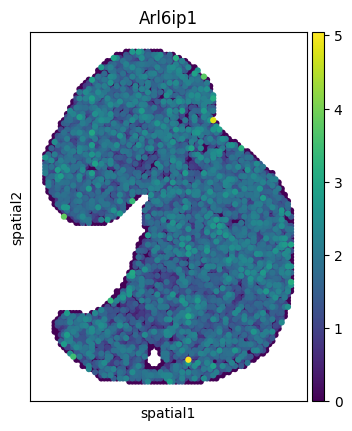

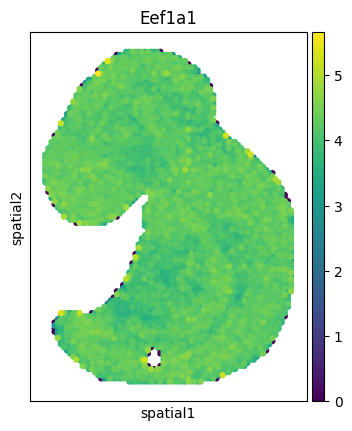

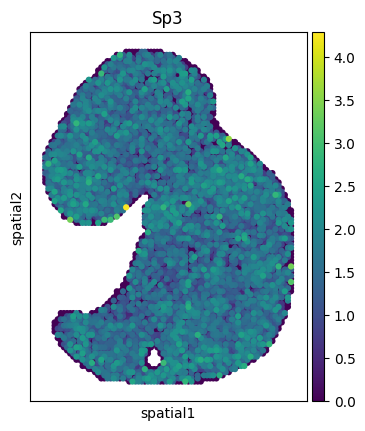

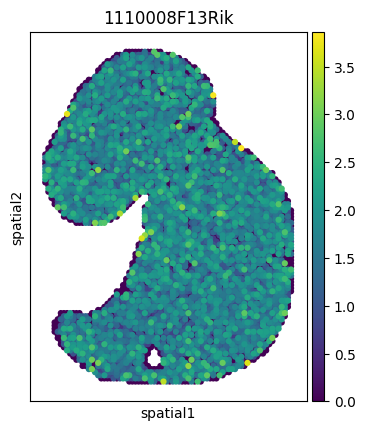

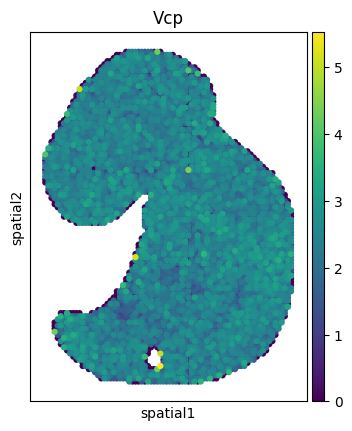

In [27]:
import numpy as np
subset_genes = np.random.choice(svg_genes_embryo_entropy, size=20, replace=False)
adata_subset = anndata_embryo[:, subset_genes]
for g in subset_genes:
  sc.pl.spatial(adata_subset, color=g, spot_size=2, show=True)

Visualizing spatially variable genes calculated with SpaGFT algorithm

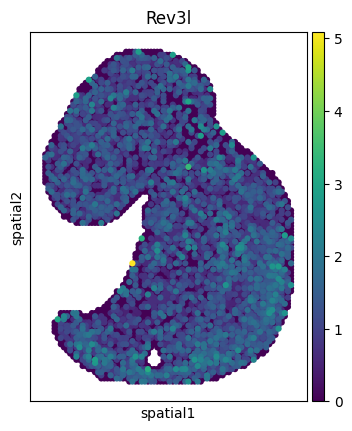

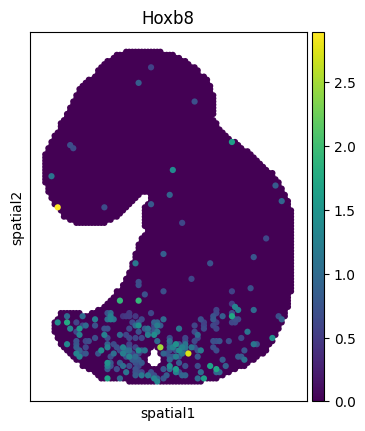

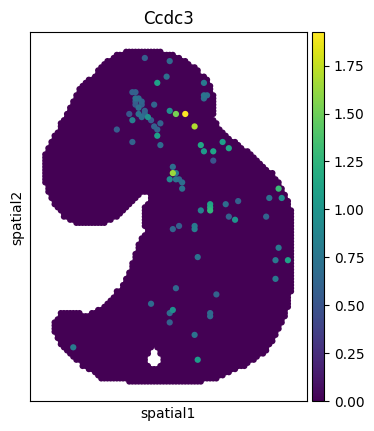

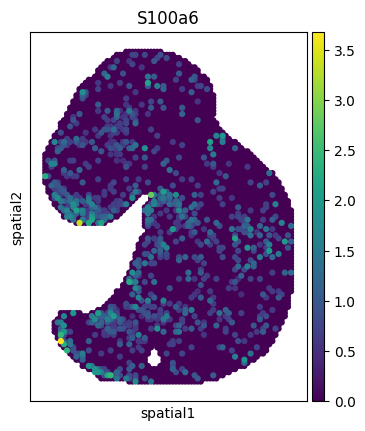

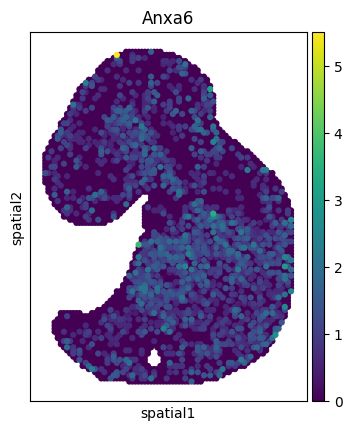

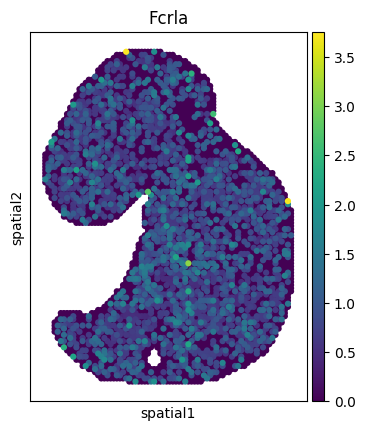

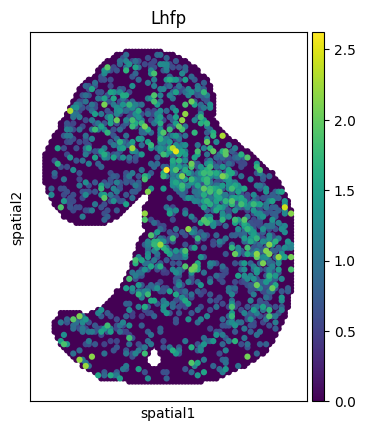

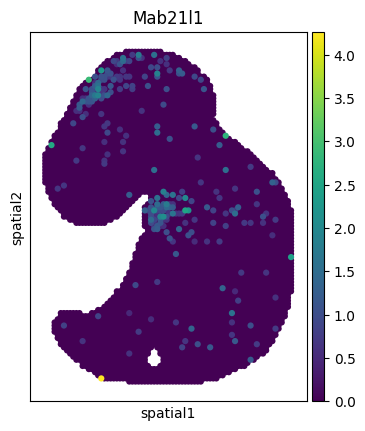

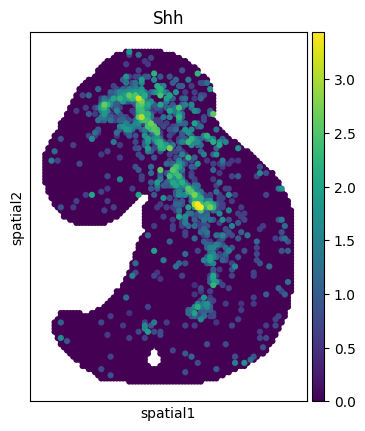

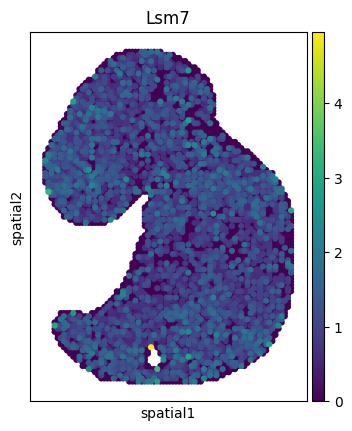

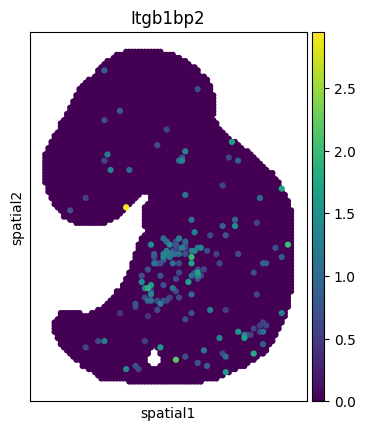

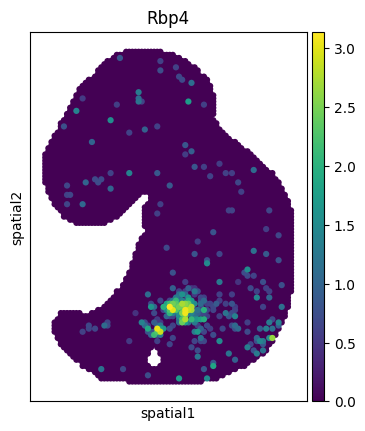

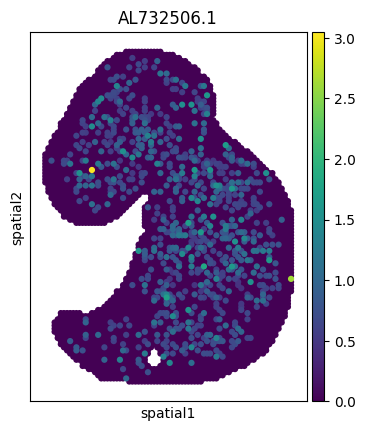

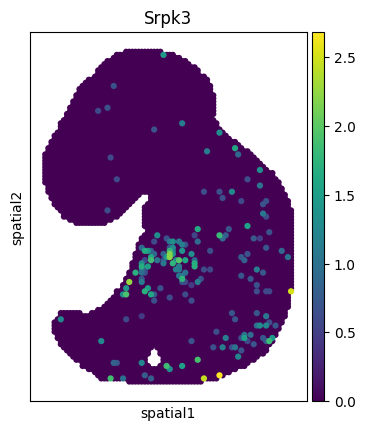

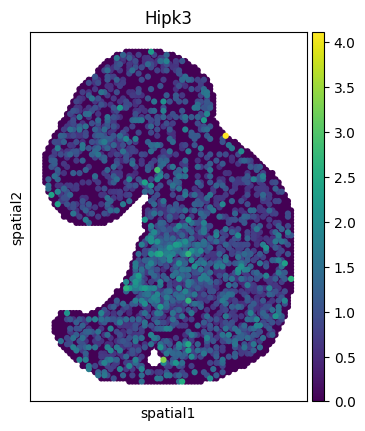

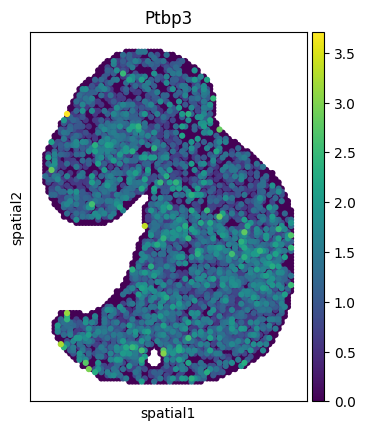

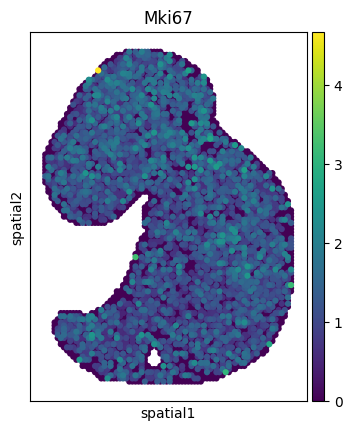

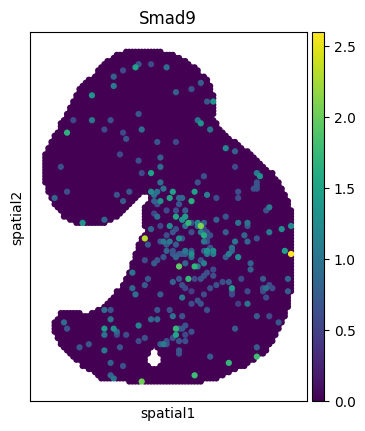

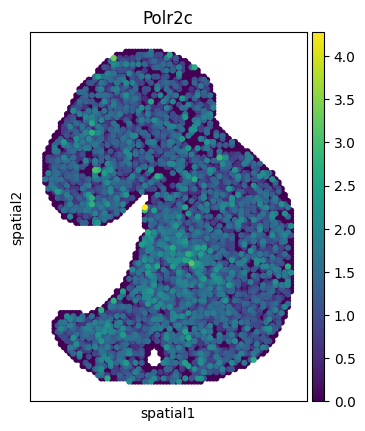

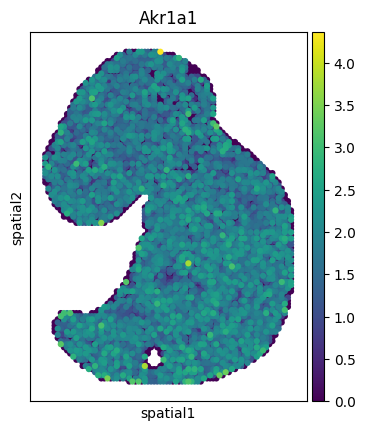

In [28]:
import numpy as np
subset_genes = np.random.choice(svg_genes_embryo_SpaGFT, size=20, replace=False)
adata_subset = anndata_embryo[:, subset_genes]
for g in subset_genes:
  sc.pl.spatial(adata_subset, color=g, spot_size=2, show=True)

Getting full list of genes from anndata objects

In [ ]:
genes_brain=list(anndata_brain.var_names)
genes_embryo=list(anndata_embryo.var_names)

In [ ]:
print(len(svg_genes_embryo_entropy))
print(len(svg_genes_embryo_moransi))
print(len(svg_genes_embryo_SpaGFT))
print(len(genes_embryo))

737
1998
2391
20055


In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
print(matplotlib.__version__)

NameError: name 'matplotlib' is not defined

Function for calculating confusion matrix

In [ ]:
def get_confusion_mat(genes,actual,predicted):
  actual_genes=np.isin(genes,actual)
  predicted_genes=np.isin(genes,predicted)
  return confusion_matrix(actual_genes,predicted_genes)

Confusion matrix for SVG calculated based on entropy from embryo

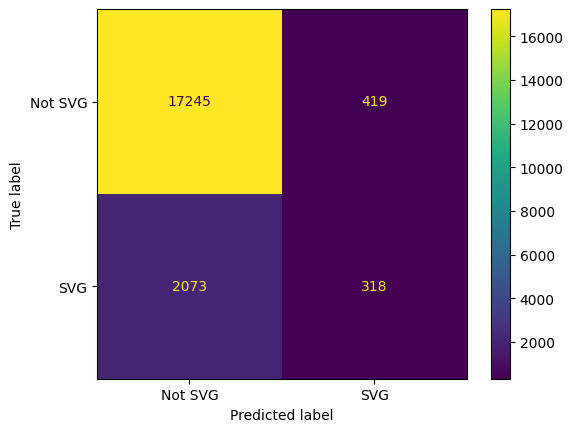

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = get_confusion_mat(genes_embryo,svg_genes_embryo_SpaGFT,svg_genes_embryo_entropy),
                                            display_labels = ["Not SVG", "SVG"])
cm_display.plot()
plt.show()

In [ ]:
def print_scores(actual,predicted,algorithm):
  macro_f1_embryo=f1_score(actual, predicted, average='macro')

  micro_f1_embryo=f1_score(actual, predicted, average='micro')

  weighted_f1_embryo=f1_score(actual, predicted, average='weighted')

  none_f1_embryo=f1_score(actual, predicted, average=None)

  auc_embryo=roc_auc_score(actual,predicted)
  print(algorithm)
  print("Macro f1 score: ",macro_f1_embryo)
  print("Micro f1 score: ",micro_f1_embryo)
  print("Weighted f1 score: ",weighted_f1_embryo)
  print("F1 score without average: ",none_f1_embryo)
  print("AUC metric: ",auc_embryo)


In [ ]:
actual_embryo=np.isin(genes_embryo,svg_genes_embryo_SpaGFT)
predicted_embryo_entropy=np.isin(genes_embryo,svg_genes_embryo_entropy)
print_scores(actual_embryo,predicted_embryo_entropy,"Entropy algorithm scores for embryo: ")

Entropy algorithm scores for embryo: 
Macro f1 score:  0.5679703376813853
Micro f1 score:  0.8757417102966841
Weighted f1 score:  0.8456682270860911
F1 score without average:  [0.93261587 0.20332481]
AUC metric:  0.5546390918503264


In [ ]:
print(len(svg_genes_brain_entropy))
print(len(svg_genes_brain_moransi))
print(len(svg_genes_brain_SpaGFT))

18
1954
2187


Confusion matrix for SVG calculated based on entropy from brain

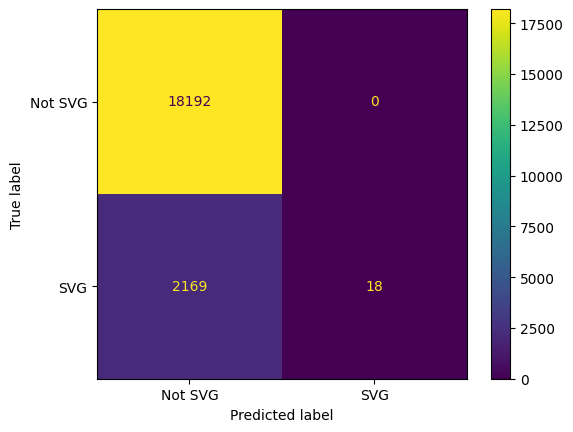

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = get_confusion_mat(genes_brain,svg_genes_brain_SpaGFT,svg_genes_brain_entropy),
                                            display_labels = ["Not SVG", "SVG"])
cm_display.plot()
plt.show()

In [ ]:
actual_brain=np.isin(genes_brain,svg_genes_brain_SpaGFT)
predicted_brain_entropy=np.isin(genes_brain,svg_genes_brain_entropy)
print_scores(actual_brain,predicted_brain_entropy,"Entropy algorithm scores for brain:")

Entropy algorithm scores for brain:
Macro f1 score:  0.4800331586996327
Micro f1 score:  0.8935669071102605
Weighted f1 score:  0.8442131764894479
F1 score without average:  [0.94373979 0.01632653]
AUC metric:  0.5041152263374485


Confusion matrix for SVG calculated based on Moran's I score from embryo

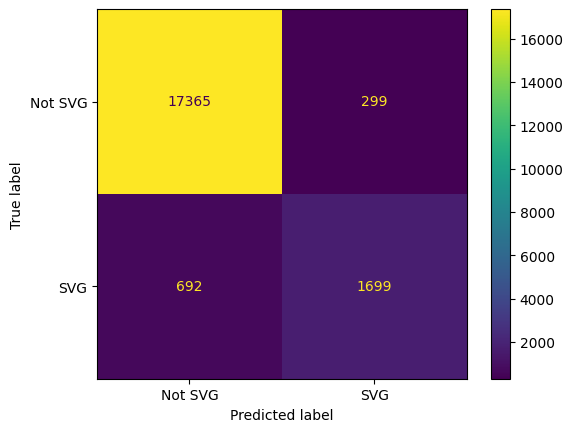

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = get_confusion_mat(genes_embryo,svg_genes_embryo_SpaGFT,svg_genes_embryo_moransi),
    display_labels = ["Not SVG", "SVG"])
cm_display.plot()
plt.show()

In [ ]:
predicted_embryo_moransi=np.isin(genes_embryo,svg_genes_embryo_moransi)
print_scores(actual_embryo,predicted_embryo_moransi,"Moran's I algorithm scores for embryo:")

Moran's I algorithm scores for embryo:
Macro f1 score:  0.8732327317679587
Micro f1 score:  0.9505858888057841
Weighted f1 score:  0.9486453940581865
F1 score without average:  [0.97225722 0.77420825]
AUC metric:  0.8468271316917608


Confusion matrix for SVG calculated based on Moran's I score from brain

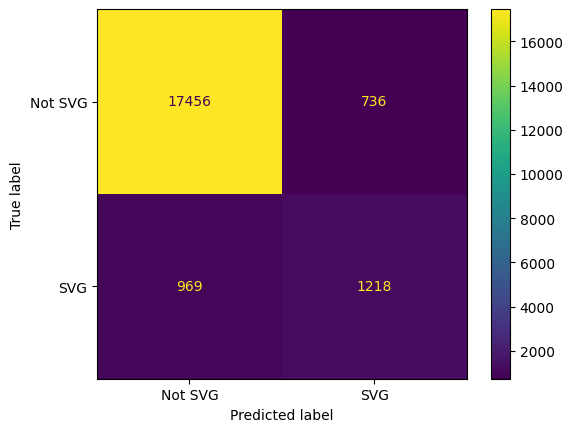

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = get_confusion_mat(genes_brain,svg_genes_brain_SpaGFT,svg_genes_brain_moransi),
    display_labels = ["Not SVG", "SVG"])
cm_display.plot()
plt.show()

In [ ]:
predicted_brain_moransi=np.isin(genes_brain,svg_genes_brain_moransi)
print_scores(actual_brain,predicted_brain_moransi,"Moran's I algorithm scores for brain:")

Moran's I algorithm scores for brain:
Macro f1 score:  0.7708503163109849
Micro f1 score:  0.9163354433485452
Weighted f1 score:  0.9142478688566279
F1 score without average:  [0.95343693 0.5882637 ]
AUC metric:  0.7582349768903077
